In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# numpy package
import numpy as np
import math

# keras mnist module
from keras.datasets import cifar10

# for plotting
import matplotlib.pyplot as plt

In [3]:
(features_train, target_train), (features_test, target_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
class_id = 0
class_count = 0
images = None
for i in range(100):
    while True:
        index = np.random.randint(0, features_train.shape[0], size=1)
        image = features_train[index]
        if target_train[index] == class_id:
            break

    if images is None:
        images = image
    else:
        images = np.concatenate([images, image], axis=0)
    class_count += 1
    if class_count == 10:
        class_id += 1
        class_count = 0
      
print(images.shape)

(100, 32, 32, 3)


airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck


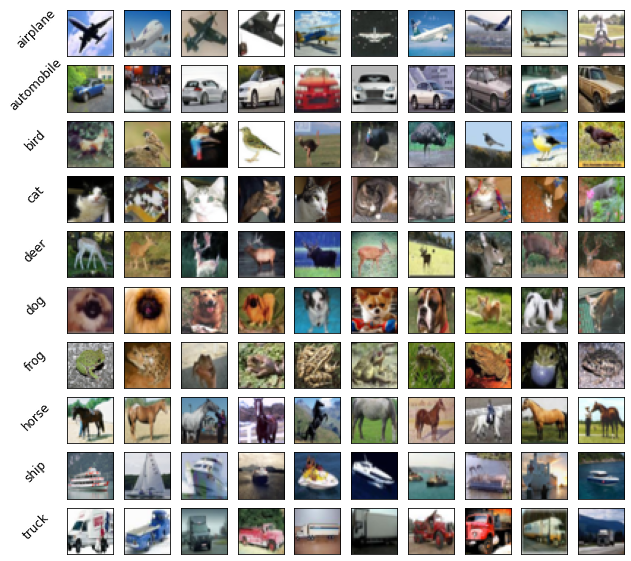

In [5]:
plt.figure(figsize=(10, 10))
num_images = images.shape[0]
image_size = images.shape[1]
rows = int(math.sqrt(num_images))
row_names = ['{}'.format(row) for row in ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']]
index = 0
for i in range(num_images):
    ax = plt.subplot(rows, rows, i + 1)
    image = images[i, :, :, :]
    image = np.reshape(image, [image_size, image_size, 3])
    plt.imshow(image)
    # plt.axis('off')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(False)
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none') 
    if (i % rows) == 0:
        ax.set_ylabel(row_names[index], rotation=45, size='large')
        ax.yaxis.labelpad = 20
        print(row_names[index])
        index += 1

# plt.tight_layout()
plt.savefig("cifar10-samples.png")
plt.show()
plt.close('all')